
--- CLICKSTREAM ---
Shape: (215376, 22)
Columns: ['fe_1', 'fe_2', 'fe_3', 'fe_4', 'fe_5', 'fe_6', 'fe_7', 'fe_8', 'fe_9', 'fe_10', 'fe_11', 'fe_12', 'fe_13', 'fe_14', 'fe_15', 'fe_16', 'fe_17', 'fe_18', 'fe_19', 'fe_20', 'Customer_ID', 'snapshot_date']
   fe_1  fe_2  fe_3  fe_4  fe_5  fe_6  fe_7  fe_8  fe_9  fe_10  fe_11  fe_12  \
0    63   118    80   121    55   193   111   112  -101     83    164    105   
1  -108   182   123     4   -56    27    25    -6   284    222    203    190   
2   -13     8    87   166   214   -98   215   152   129    139     14    203   

   fe_13  fe_14  fe_15  fe_16  fe_17  fe_18  fe_19  fe_20 Customer_ID  \
0    -16    -81   -126    114     35     85    -73     76  CUS_0x1037   
1    -14    -96    200     35    130     94    111     75  CUS_0x1069   
2     26     86    171    125   -130    354     17    302  CUS_0x114a   

  snapshot_date  
0    2023-01-01  
1    2023-01-01  
2    2023-01-01  

--- ATTRIBUTES ---
Shape: (12500, 6)
Columns: ['Customer_ID

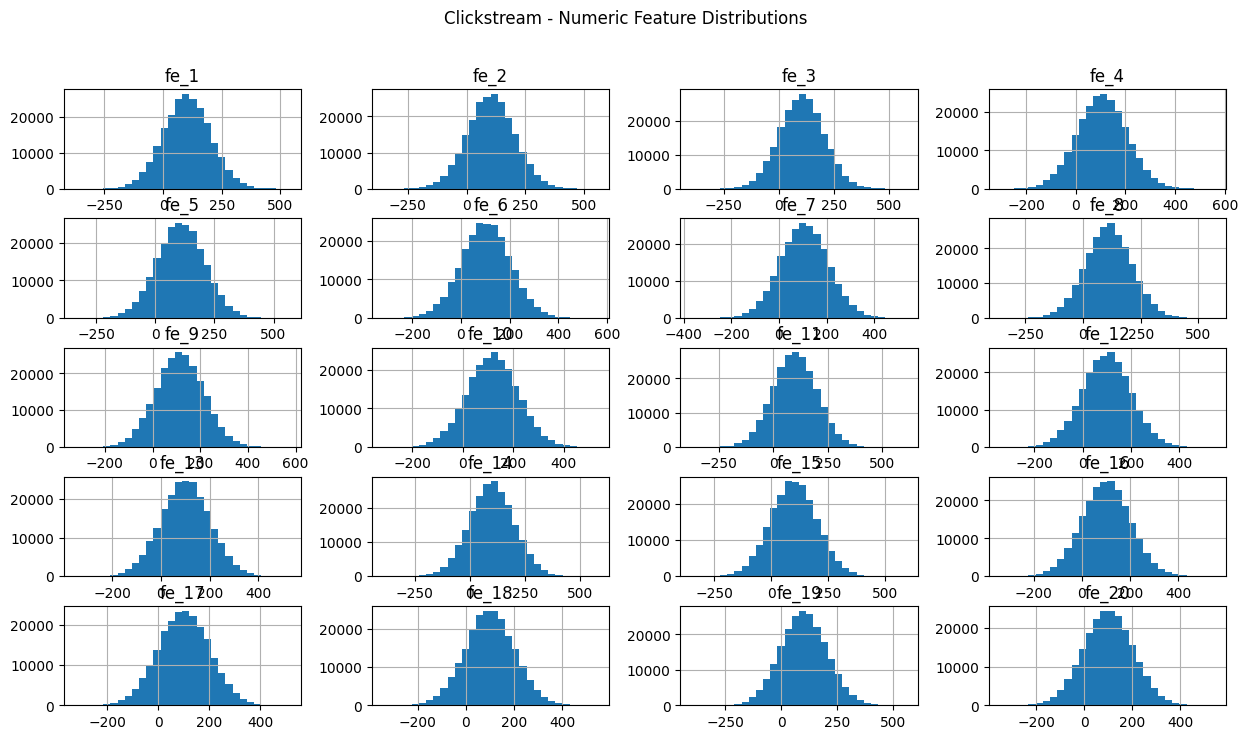

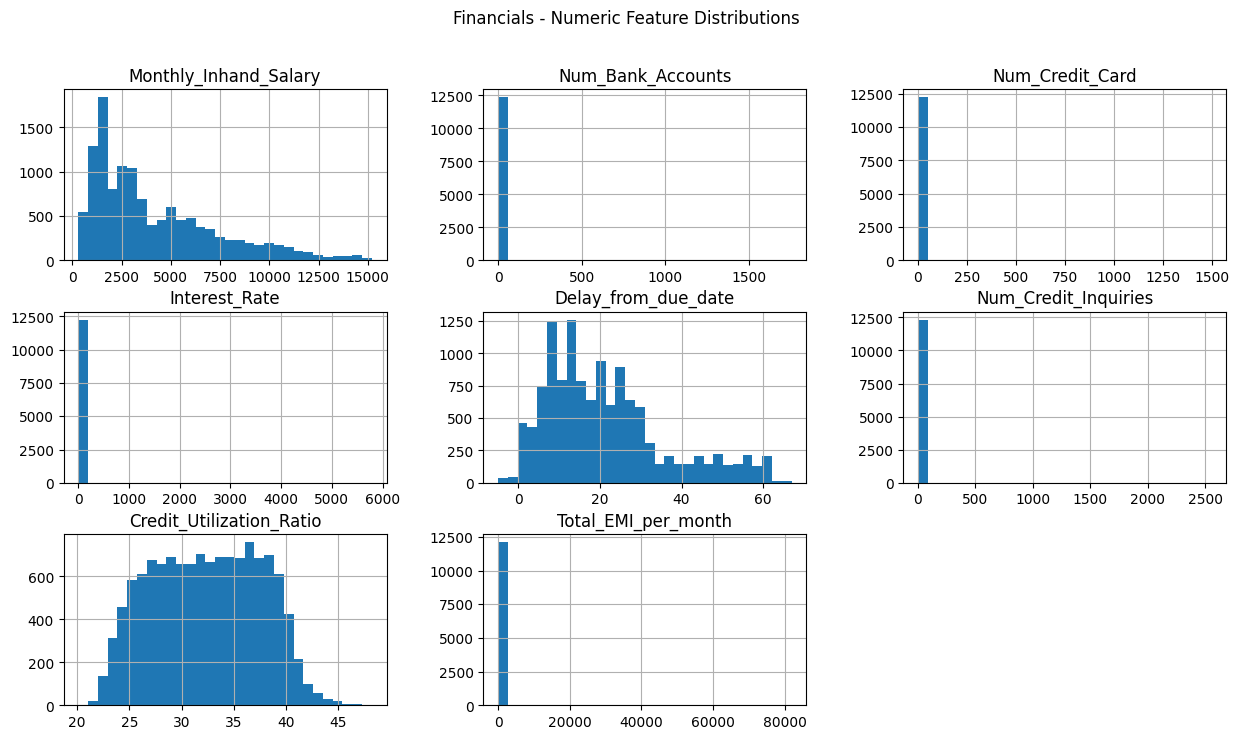

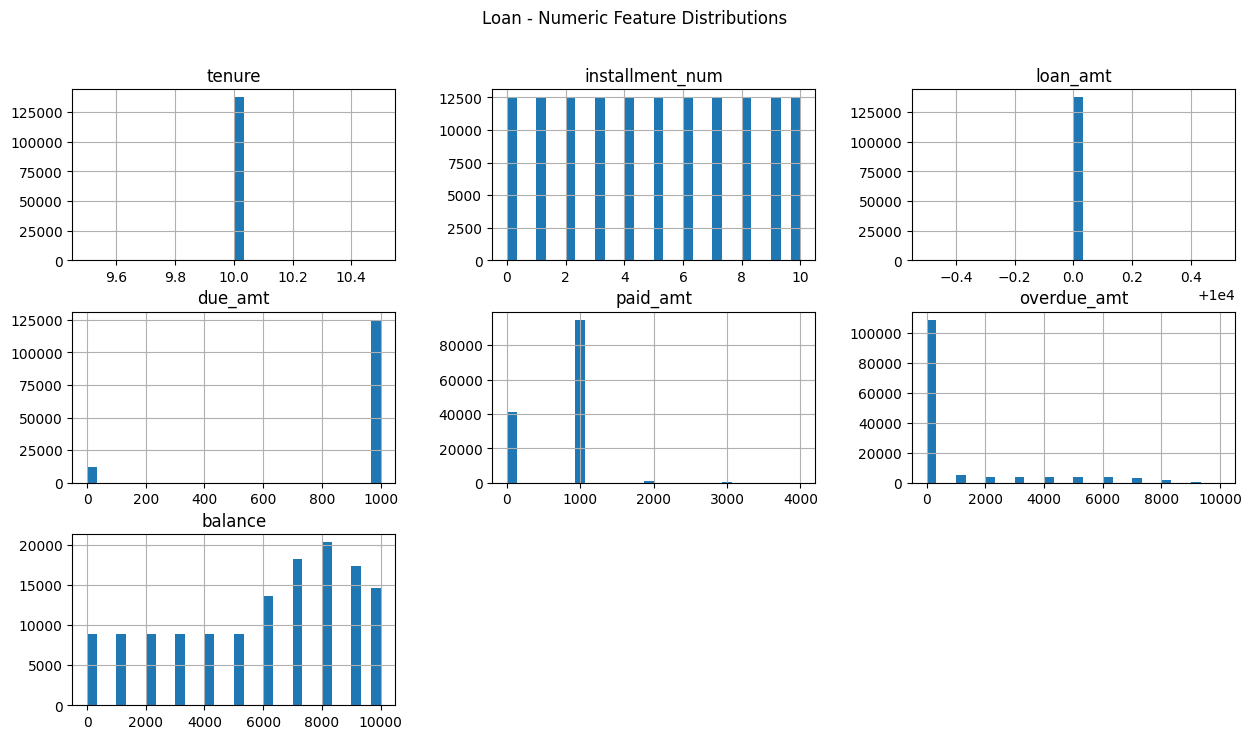


clickstream: Customer_ID value counts:
Customer_ID
CUS_0xfe4     24
CUS_0x1037    24
CUS_0x1069    24
CUS_0x114a    24
CUS_0x1184    24
CUS_0x1297    24
CUS_0x12fb    24
CUS_0x1325    24
CUS_0x1341    24
CUS_0x1375    24
Name: count, dtype: int64

clickstream: snapshot_date value counts:
snapshot_date
2023-01-01    8974
2023-02-01    8974
2023-03-01    8974
2023-04-01    8974
2023-05-01    8974
2023-06-01    8974
2023-07-01    8974
2023-08-01    8974
2023-09-01    8974
2023-10-01    8974
Name: count, dtype: int64

attributes: Customer_ID value counts:
Customer_ID
CUS_0xffd     1
CUS_0x1000    1
CUS_0x1009    1
CUS_0x100b    1
CUS_0xfbd     1
CUS_0xfb8     1
CUS_0xfb6     1
CUS_0xfb4     1
CUS_0xfaf     1
CUS_0xfae     1
Name: count, dtype: int64

attributes: Name value counts:
Name
Langep                6
Stevex                6
Jessicad              6
Phil Wahbag           5
Valetkevitchv         5
Jonathan Stempelr     5
Ryan Vlastelicad      5
Phila                 5
Deepa Seethara

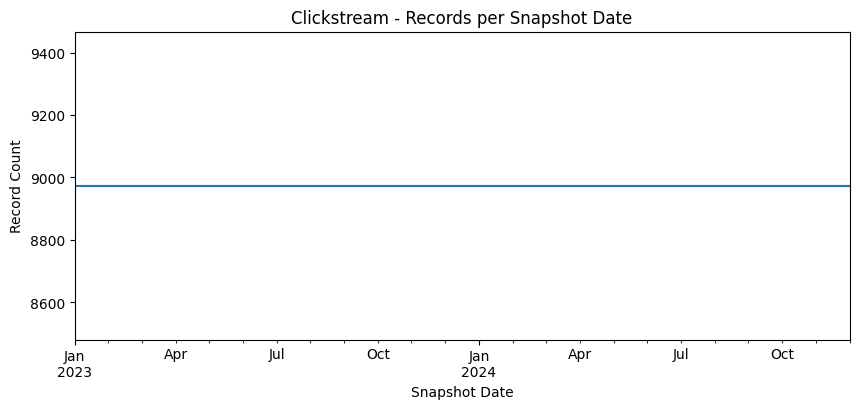

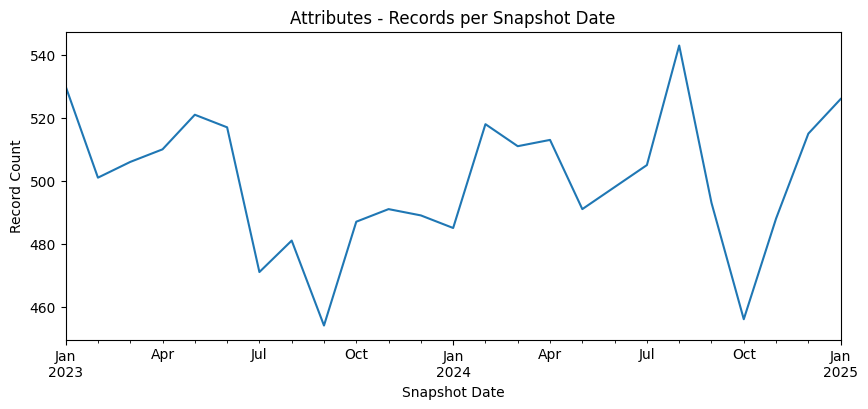

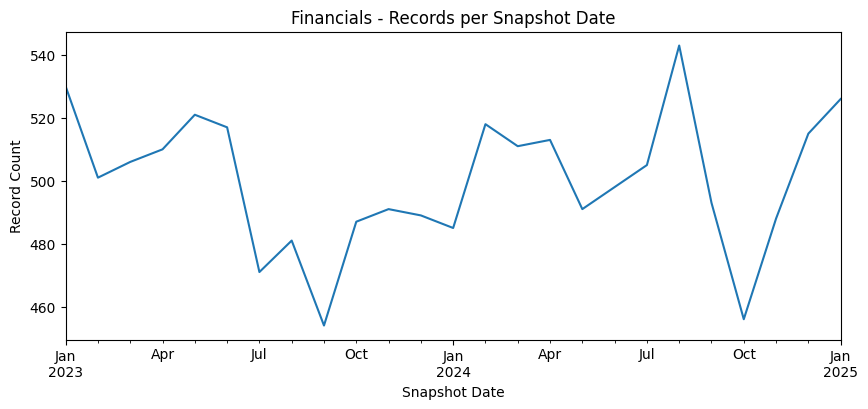

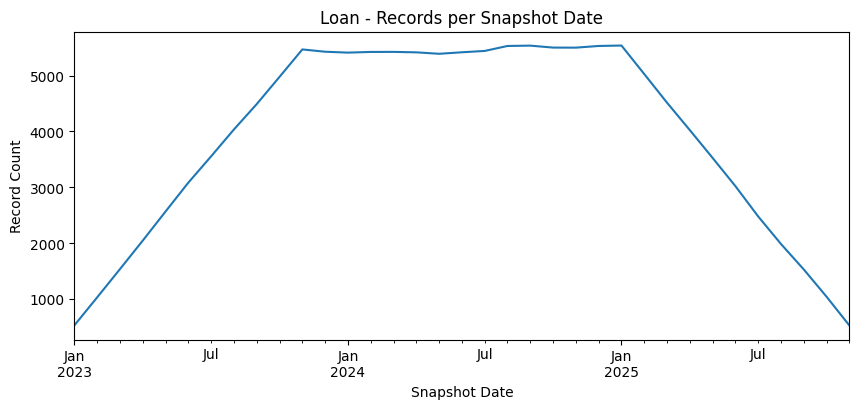

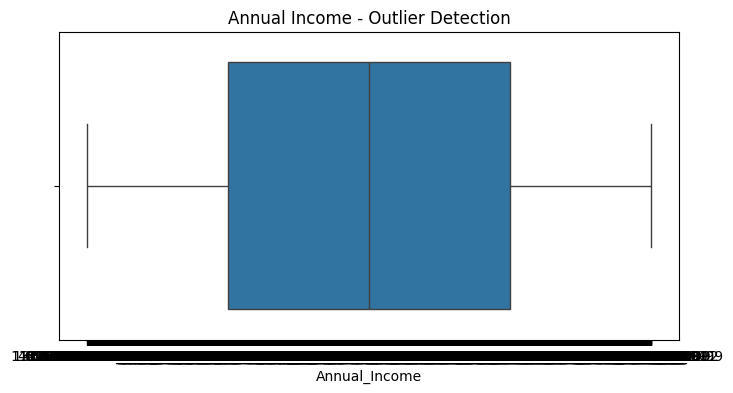


EDA complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 100)

# File paths
data_dir = "data"
files = {
    "clickstream": "feature_clickstream.csv",
    "attributes": "features_attributes.csv",
    "financials": "features_financials.csv",
    "loan": "lms_loan_daily.csv"
}

# Load data
dfs = {name: pd.read_csv(os.path.join(data_dir, fname)) for name, fname in files.items()}

# 1. Data Profiling
for name, df in dfs.items():
    print(f"\n--- {name.upper()} ---")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    print(df.head(3))

# 2. Missing Value Analysis
for name, df in dfs.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())

# 3. Distribution Analysis (Numeric Features)
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(figsize=(15, 8), bins=30)
        plt.suptitle(f"{name.capitalize()} - Numeric Feature Distributions")
        plt.show()

# 4. Categorical Feature Exploration
for name, df in dfs.items():
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"\n{name}: {col} value counts:")
        print(df[col].value_counts(dropna=False).head(10))

# 5. Temporal Trends
for name, df in dfs.items():
    if 'snapshot_date' in df.columns:
        try:
            df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')
            plt.figure(figsize=(10, 4))
            df['snapshot_date'].value_counts().sort_index().plot()
            plt.title(f"{name.capitalize()} - Records per Snapshot Date")
            plt.xlabel("Snapshot Date")
            plt.ylabel("Record Count")
            plt.show()
        except Exception as e:
            print(f"Could not plot temporal trend for {name}: {e}")


# 6. Outlier Detection Example (Boxplot for Annual_Income)
if 'financials' in dfs and 'Annual_Income' in dfs['financials'].columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dfs['financials']['Annual_Income'])
    plt.title("Annual Income - Outlier Detection")
    plt.show()

print("\nEDA complete.")